# 📊 ROC AUC with Confidence Interval using pauc

This example demonstrates how to compute the Area Under the ROC Curve (AUC) along with a 95% confidence interval using the roc_auc_ci_score function from the pauc package. This is particularly useful when evaluating the performance of binary classifiers and quantifying the uncertainty around the AUC estimate.

In [2]:
from pauc import roc_auc_ci_score
import numpy as np

y_true = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])
y_pred = np.array([0.1, 0.35, 0.24, 0.8, 0.2, 0.85, 0.13, 0.85, 0.74, 0.58, 0.71, 0.25])

auc, (lb, ub) = roc_auc_ci_score(y_true, y_pred)
print(f'AUC: {auc:.3f}, 95% CI: ({lb:.3f}, {ub:.3f})')

AUC: 0.708, 95% CI: (0.378, 1.000)


✅ This function uses DeLong’s method by default for fast, reliable confidence interval estimation of the AUC, making it suitable for scientific benchmarking and publication-ready evaluation.

# 📈 Comparing Two ROC AUCs with DeLong’s Test using pauc

This example illustrates how to statistically compare the AUCs of two different models using delong_roc_test from the pauc package. DeLong’s test evaluates whether the difference between the two ROC AUCs is statistically significant.

In [3]:
from pauc.roc_auc_ci import delong_roc_test

y_true = np.array([0, 0, 1, 1, 0, 1, 0])
pred1 = np.array([0.1, 0.35, 0.4, 0.8, 0.2, 0.75, 0.1])
pred2 = np.array([0.5, 0.92, 0.1, 0.1, 0.8, 0.95, 0.9])

log_pval = delong_roc_test(y_true, pred1, pred2)
p_value = 10 ** log_pval
print(f"DeLong’s test p-value: {p_value}")

DeLong’s test p-value: 0.045500263896358466


🧪 This test answers the question: “Are the differences in AUC between two models statistically significant, or could they be due to random chance?”

Lower p-values (typically < 0.05) suggest significant differences in performance.

Now lets load a dataset to test out this and plot

In [4]:
import pandas as pd

df = pd.read_csv("../assets/test_data_auc_ci_plot.csv")
df

,y_prob,y_true
0,0.575991,1.0
1,0.563155,1.0
2,0.514204,1.0
3,0.513137,1.0
4,0.556803,1.0
...,...,...
195,0.508687,1.0
196,0.508670,0.0
197,0.498804,1.0
198,0.495230,0.0


# ✅ Calculating AUC with DeLong Confidence Interval from a DataFrame

This example shows how to calculate the ROC AUC score and its 95% confidence interval using data stored in a pandas DataFrame. The roc_auc_ci_score function from the pauc package implements DeLong’s method, which provides a statistically valid and widely accepted confidence interval around the AUC.

In [5]:
# Example data
y_true = np.array(df.y_true)
y_pred = np.array(df.y_prob)

auc, (lb, ub) = roc_auc_ci_score(y_true, y_pred)
print("This is a statistically valid confidence interval on the AUC using the DeLong method.")
print(f'AUC: {auc:.3f}, 95% CI: ({lb:.3f}, {ub:.3f})')

This is a statistically valid confidence interval on the AUC using the DeLong method.
AUC: 0.776, 95% CI: (0.711, 0.840)


# 🌀 Bootstrapped AUC with 95% Confidence Interval using pauc

This example demonstrates how to compute the mean AUC and a nonparametric 95% confidence interval using bootstrapping, via the bootstrap_auc_ci function from the pauc package. Bootstrapping is especially useful when you want to avoid parametric assumptions about your data distribution or when using small datasets.

In [6]:
from pauc import bootstrap_auc_ci

mean_auc, (ci_lower, ci_upper) = bootstrap_auc_ci(y_true, y_pred)
print(f"Bootstrapped AUC mean: {mean_auc:.3f}, 95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")

This gives an empirical confidence interval of the AUC using bootstrapping. It may differ slightly due to randomness.
Bootstrapped AUC mean: 0.775, 95% CI: (0.704, 0.839)


🔁 This method repeatedly samples with replacement from the original data to empirically estimate the AUC distribution and its confidence interval.

📌 While DeLong is faster and theoretically grounded, bootstrapping offers flexibility and robustness, especially when the sample size is small or the data distribution is unusual.

# 📉 Plotting ROC Curve with Confidence Intervals using pauc


This example shows how to plot the ROC curve along with confidence intervals using plot_roc_with_ci from the pauc package. The function visualizes:

-The mean ROC curve from bootstrapped samples

-A shaded 95% confidence region around the curve

-AUC value with confidence interval in the legend

⚠️ Note:
The TPR envelope AUC range is not the same as a formal statistical confidence interval.
It simply reflects the area under the lower and upper percentile ROC curves—useful for visualization, but not for hypothesis testing.

AUC from TPR curves: 0.775
TPR Envelope AUC range: (0.677, 0.863)
TPR Envelope AUC range is not the statistical confidence interval, it's just the area under the lower/upper percentile ROC curves.


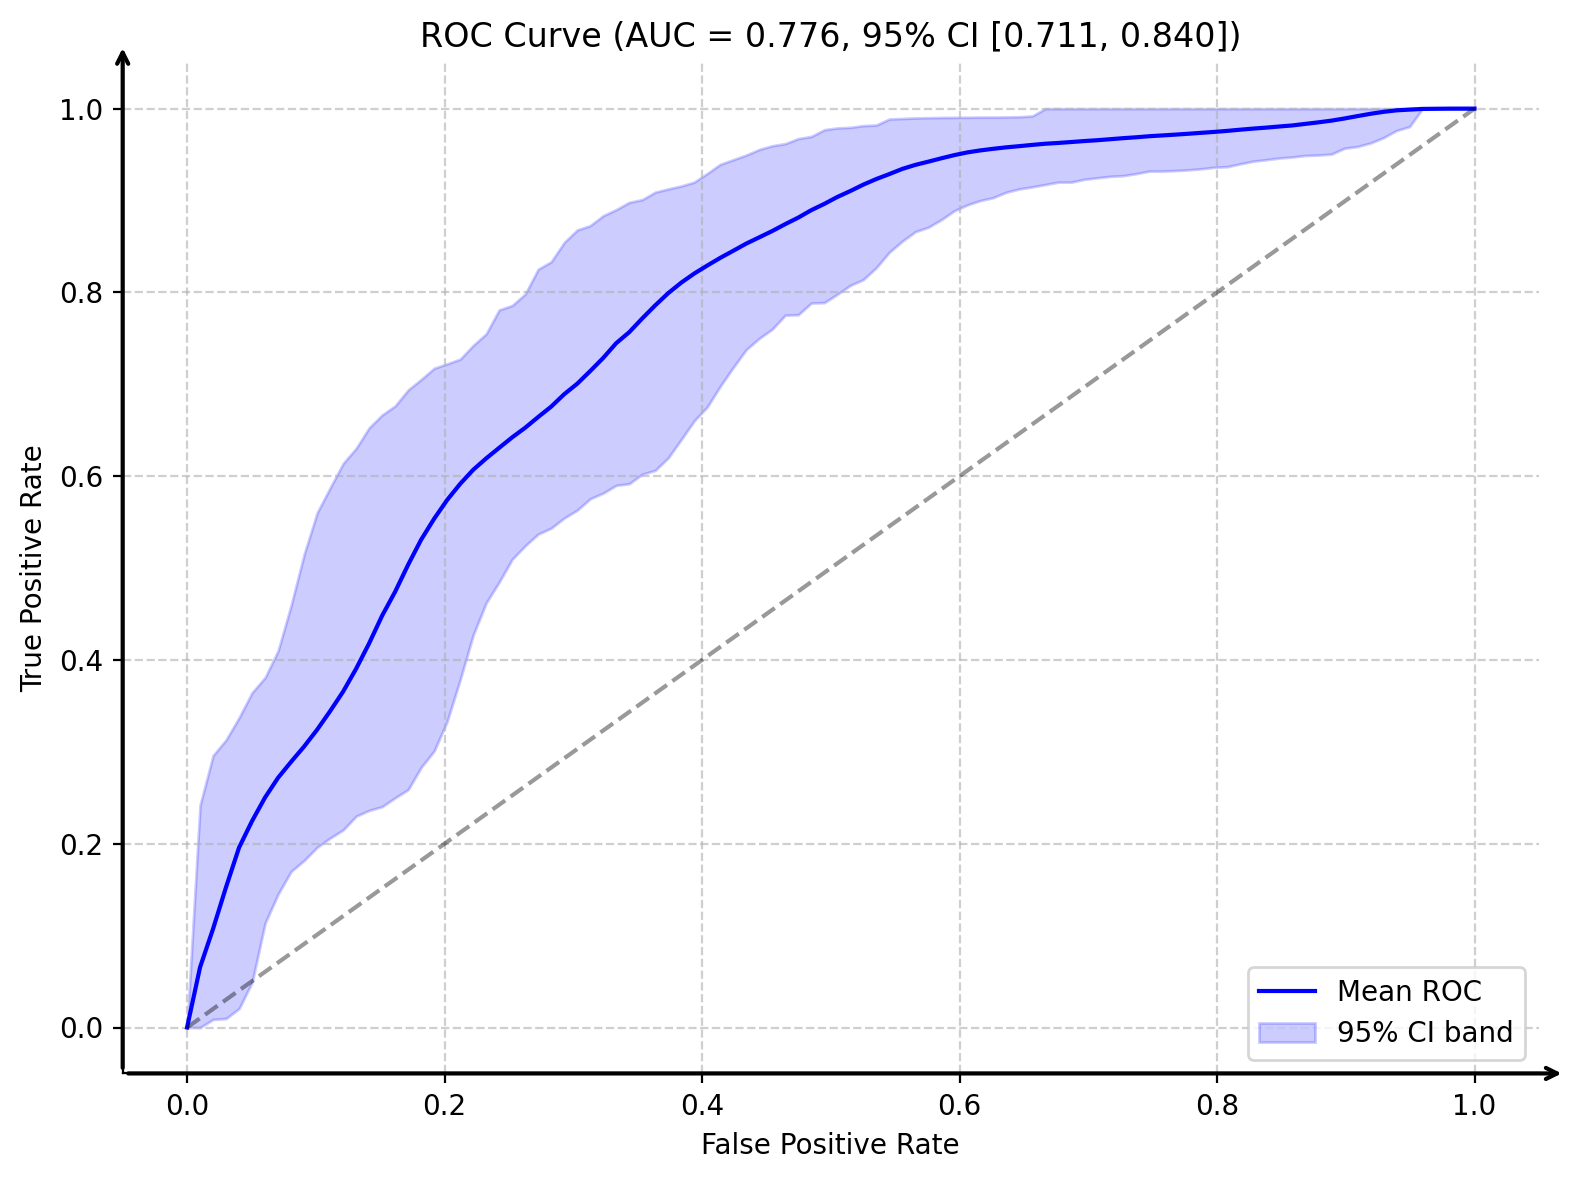

In [7]:
from pauc import plot_roc_with_ci
plot_roc_with_ci(y_true, y_pred)